# **Predicting Metastatic Breast Cancers: A custom Implementation of Logistic Regression via Numpy**
---
The following document details a basic EDA on the features relevant to metastatic and benign breast cancers. The exploration and prediction of benign or metastatic cancers will be done through a custom implementation of Logistic Regression using Numpy Libraries, with visualizations for ease of use. Please refer to the logreg.py script for the documentations of these functions attached to this document.

The dataset was obtained from a subset of the larger Breast Cancer Wisconsin dataset, which details information about the size and shapes of different tumors, as well as a classification variable, either of which being 2 or 4, for benign and metastatic tumors respectively. More information can be found [here](https://www.kaggle.com/datasets/marshuu/breast-cancer).

## Introduction
---
Metastatic breast cancer is the stage at which cancer cells spread from the breast to other parts of the body (e.g., bones, liver, lungs, or brain). Early and accurate classification of metastatic breast cancer is crucial because:

  - Treatment Decisions: Patients with metastatic disease often need different treatment strategies—such as targeted therapies or more aggressive approaches—than those whose cancer is still localized.

  - Prognosis and Outcomes: Metastatic breast cancer is more difficult to treat and is associated with lower survival rates. Correct classification ensures that the most effective interventions are used as early as possible.

  - Personalized Medicine: Accurate classification can guide oncologists to tailor therapies to a patient’s specific cancer subtype, potentially improving both quality of life and survival outcomes.

Therefore, it is imperative that we classify such cases as quickly and effectively as possible in order to streamline treatments and increase remission rates among patients with such a serious prognosis as this.

## Loading the Dataset
---
I have downloaded the following dataset from the link above. We will be loading it in via pandas.

In [323]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from logreg import LogisticRegression as LogisticRegression

df = (pd.read_csv("datasets/breast_cancer.csv"))


We see that we have 1 class variable, and 9 features within the dataset that are as follows:

In [324]:
columns = df.columns.to_list()
print(columns)

['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']


We will save the features and labels accordingly:

In [325]:
features = columns[:-1]
print("features: ",features)
label = columns[-1]
print("label: ", label)

features:  ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
label:  Class


## Data Cleaning
---
**Step 1:** Although it was mentioned that some data cleaning was already performed on this dataset, we will be doing further cleaning to ensure that the dataset is ready to perform furhter analysis on. We will first check for nulls:

In [326]:
np.sum(df.isna(), axis=0)

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

We have no null values.

**Step 2:** We secondly need to ensure that all of the variables are numerical, not categorical. We will therefore review the following:

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


We therefore have all numerical values. 

**Step 3:** We need to view the data if any transformations are needing to be made to some values, such as class for binary encoding. We will therefore view the data more in-depth.

In [328]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


As we can see, class is not represented as binary 0/1. Based on prior knowledge of cancers, we can assume that there are 4 different stages of cancer, and that we need to inspect the makeup of this row to see if the class is truly a binary classifier.

In [329]:
print(df['Class'].unique())

[2 4]


It seems that stages 2 and 4 are the only represented stages, making our label binary. We need to ensure that these values are replaced with 0 and 1 for stage 2 and stage 4 cancer respectively. We will therefore perform the following operation.

In [330]:
df.replace({'Class': {2: 0, 4: 1}}, inplace=True)
print("Unique Values: ", df['Class'].unique())


Unique Values:  [0 1]


In [331]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


**Step 4:** We want to check for class imbalances. We will therefore view the number of 1s and 0s in the dataset respectively.


In [332]:
numberOfOnes = np.count_nonzero(df['Class'])
print("Number of stage 2 cases: " , round((len(df) - numberOfOnes)/len(df) * 100,3), "%")
print("Number of stage 4 cases: " , round(numberOfOnes/len(df) * 100,3), "%")


Number of stage 2 cases:  65.007 %
Number of stage 4 cases:  34.993 %


We can see that the dataset is slightly imbalanced, with a class imbalance shifted towards the stage 2 (0) case. Based on this, there might be a slight class imbalance towards this majority class that we must remain mindful about.

The Class has now been replaced with binary 0/1 values. That dataset is now ready for further exploration.

## Initial EDA
---
**Step 1:** We want to better visualize the relationships between the data and the classifier. We will therefore be building a boxplot pairing the relationships of every feature to better visualize theire respective relationships:

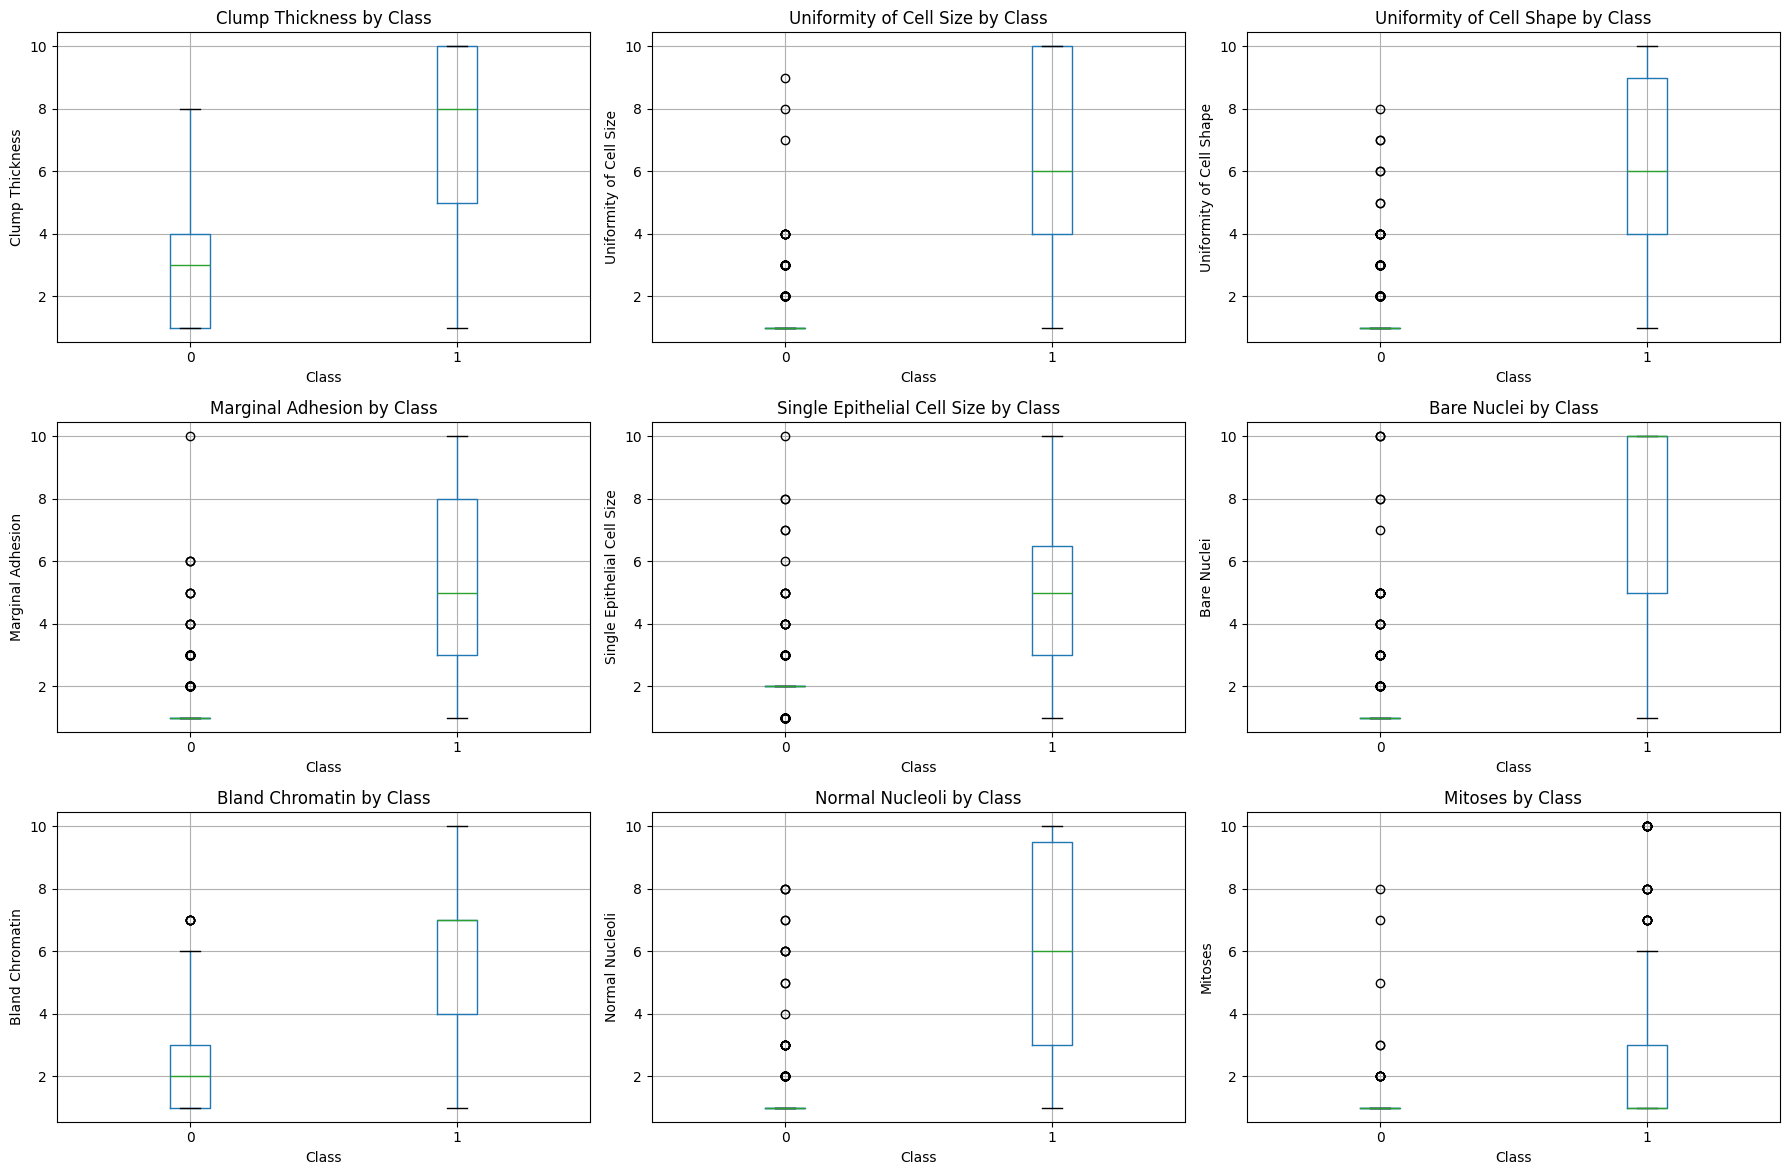

In [333]:

features = [
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    df.boxplot(column=feature, by='Class', ax=ax)
    ax.set_title(f"{feature} by Class")
    ax.set_xlabel("Class")
    ax.set_ylabel(feature)
    
plt.suptitle("")

plt.tight_layout()
plt.show()


Based on the box and whisker plots for the respective 0 and 1 values above, where most of the boxes can be seperated by some horizontal line on the plot. We can therefore see that a majority of the features in the dataset can be approximately linearly seperated, making it a prime candidate for prediction via the use of Logistic regression. 

**Step 2:** We want to see the colinearities between the class and the features, in order to gauge if the use of regularization techniques could yield a better result than naively fitting all of the features to a model. We will therefore construct a correlation heatmap and analyze VIF score to adjust techniques accordingly.

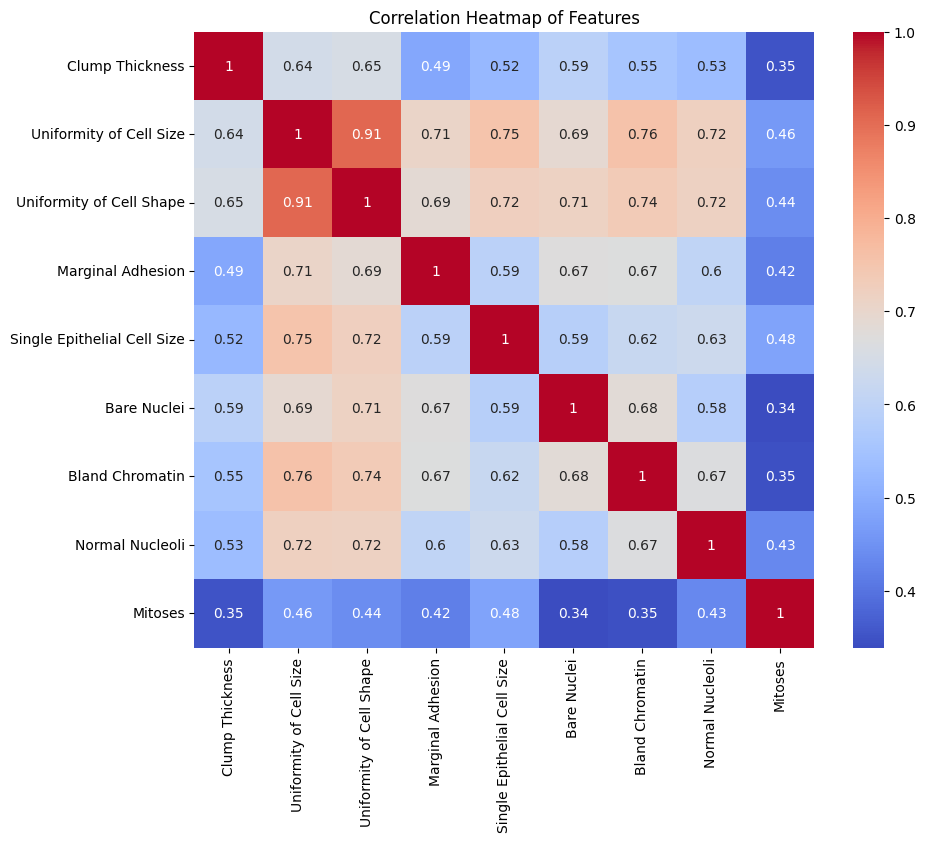

In [334]:
corr_matrix = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

We can see that all of the features will most likely constribute some fairly meaningful data to the overall predictions based on the heatmap, with one variable being hihgly multicolinear. This suggests the use of Ridge Regression to ensure a sparser unique solution for better regularization.

## Constructing the Model
---
**Step 1:** Based on the custom implementation of Logistic regression, it is required that the data be passed in as a numpy array. We will therefore do the following prep in order to ready the dataset. We will also seed our work for reproduceability.

In [335]:
np.random.seed(100)
numpydata = df.to_numpy()

**Step 2:** We need to seperate our label data from our features for correct model learning, then split it for training and testing. The incorperated Logistic Regression class automatically shuffles our test data as well, and automatically splits for an 80/20 test split.

In [336]:
onlyFeatures = numpydata[:,:-1]
onlyLabels = numpydata[:,-1:]

trainFeatures,trainLabels,testFeatures,testLabels = LogisticRegression.trainTestSplit(onlyFeatures,onlyLabels,randomState=100)

**Step 3:** In order to ensure that all features offer equal contribution and achieve better convergence, it is in our best interest to standardize the data. This is done by subtracting the mean calculated from every feature, then dividing this difference by the standard deviation of said feature. The Logistic Regression class allows us to do this as follows:

In [337]:
Standardizer = LogisticRegression.standardizer(trainFeatures)
trainFeatures = LogisticRegression.standardizeCompute(trainFeatures,Standardizer)
testFeatures = LogisticRegression.standardizeCompute(testFeatures,Standardizer)
print(len(testFeatures))

137


Notice how we use the standardizations from the training set. This is to avoid data leakage into the testing set upon evaluation.

**Step 4:** We will now fit our regression model with all of the features with 5-fold cross-validation, and see how well it performs.

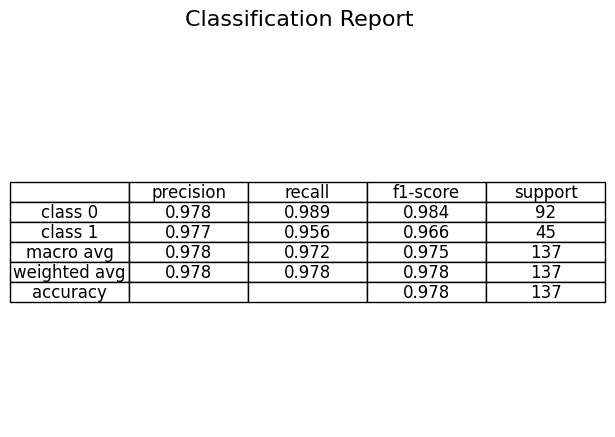

In [338]:
model,_,_ = LogisticRegression.crossfoldValidation(trainFeatures,trainLabels,randomState=100)
model = np.mean(model,axis=0)
LogisticRegression.displayClassificationReport(testFeatures,testLabels,model)

We see that we have an overall accuracy of 97.8%, and an f1 score of .984. This is indicative of extremely strong predictive capabilities.

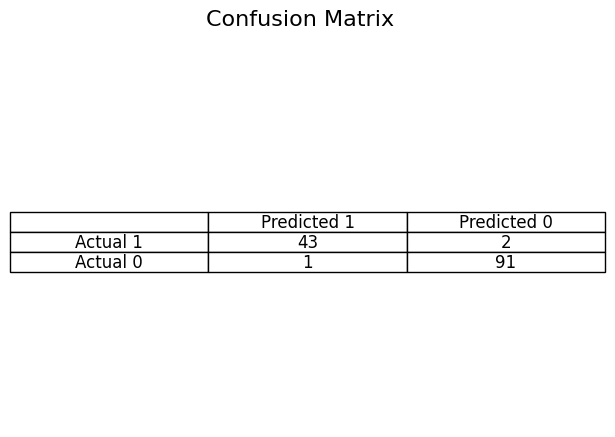

In [339]:
LogisticRegression.displayConfusionMatrix(testFeatures,testLabels,model)

Out of the 137 test features, we only had 3 misclassifications. However, based on earlier EDA, we saw some multicolinearity between the features. This suggests a regularization technique, such as ridge regression. We can implement it as follows:

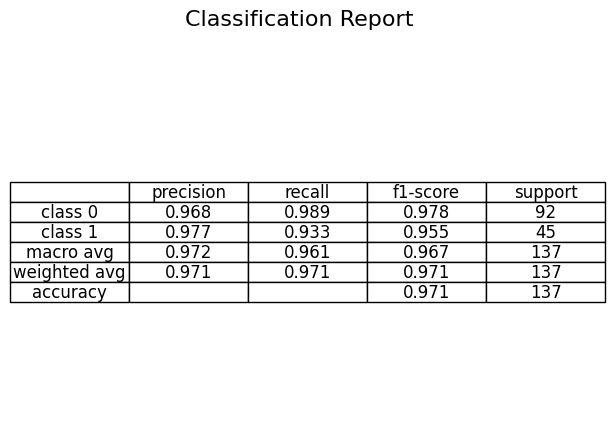

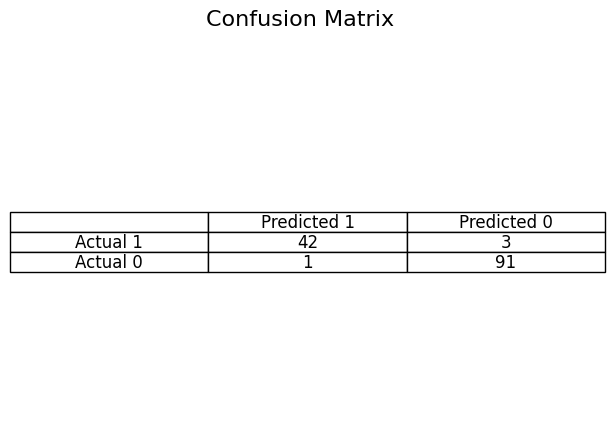

In [340]:
regularizedModel,_,_ = LogisticRegression.crossfoldValidation(trainFeatures,trainLabels,alpha=0,lam=10.394,randomState=100)
regularizedModel = np.mean(regularizedModel, axis=0)
LogisticRegression.displayClassificationReport(testFeatures,testLabels,regularizedModel)
LogisticRegression.displayConfusionMatrix(testFeatures,testLabels,regularizedModel)

We can see that we have achieved a simpler model, all while maintaining the generalizeability of the previous model.

## Future Work:
---
There is definitely a lot more room for expansion of this project. For one, expanding the dataset may yield better generalizability. It may be worthwhile to therefore switch to other tools, such as stochastic gradient descent, or batched gradient descent, as shown by its extremely quick convergence below:

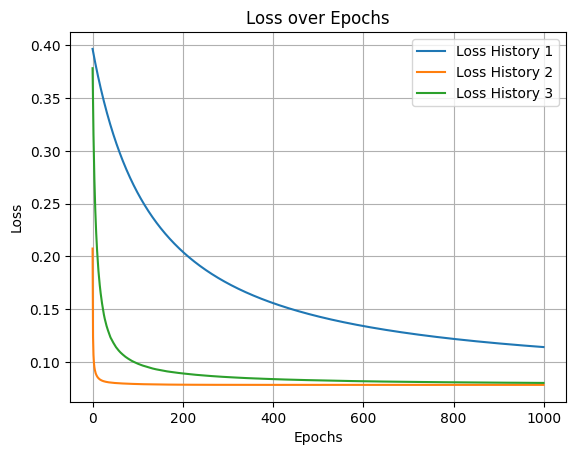

In [341]:
_, lossHistory = LogisticRegression.fit(trainFeatures,trainLabels,randomState=100)
_, lossHistory2 = LogisticRegression.fit(trainFeatures,trainLabels,loss="SGD",randomState=100)
_, lossHistory3 = LogisticRegression.fit(trainFeatures,trainLabels,loss="SGD",batchSize=30,randomState=100)

LogisticRegression.displayLossOverEpochs([lossHistory,lossHistory2,lossHistory3])

Secondly, while not performed in this EDA, LASSO or ElasticNet could be experimented with to achieve models with better generalizability. Lastly, it is possible that the regularization parameter can be tweaked even more rigorously to achieve an even better generalized model.

## Conclusions
---


My analysis demonstrates that employing a ridge regression model not only achieved an impressive 97.8% accuracy with an F1-score of 0.984 but also provided a simpler alternative to conventional logistic regression. This balance of high performance and model simplicity is especially valuable in the clinical context, where interpretability and ease of implementation can enhance decision-making.

The classification of breast cancer remains a critical task in healthcare. Early and accurate diagnosis can significantly improve patient outcomes by facilitating timely interventions and more personalized treatment strategies. These findings underscore the importance of continuous exploration and optimization of predictive models, as even subtle improvements in model design can have a profound impact on patient care and survival rates.

Moving forward, integrating such efficient and robust models into clinical workflows could be a pivotal step toward advancing early detection efforts and ultimately saving lives.